# ATHARVA ANIL DAHOTRE

# GRIP : THE SPARKS FOUNDATION


# Data Science and Business Analytics Intern
 

# TASK 5 : EXPLORATORY DATA ANALYSIS - SPORTS  

***In this we have to perform 'Exploratory data analysis' on dataset 'Indian Premier League'. As a sports analyst, find out most successful team, players and factors contributing win or loss of a team***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wg
wg.filterwarnings('ignore')

***Reading the dataset***

In [3]:
data =pd.read_csv("Matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
Data=pd.read_csv("Deliveries.csv")
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
season_data = data[['id', 'season', 'winner']]
                    
complete_data = Data.merge(season_data, how='inner', left_on='match_id', right_on='id')

In [6]:
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [7]:
data = data.drop(columns=['umpire3'],axis=1)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [8]:
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

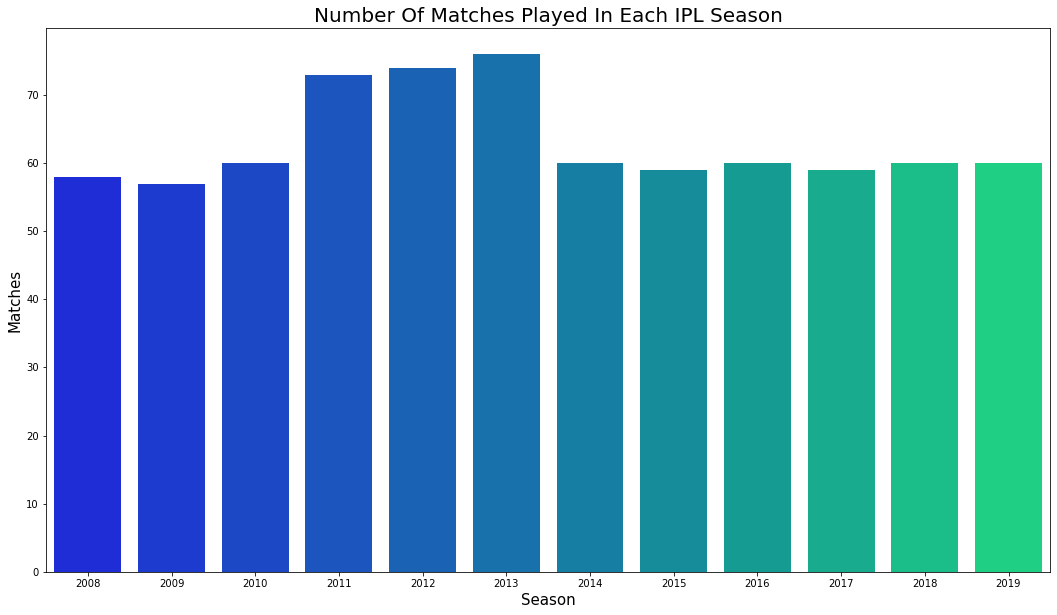

In [9]:
plt.figure(figsize=(18,10))
sns.countplot('season',data=data,palette='winter')
plt.title('Number Of Matches Played In Each IPL Season',fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

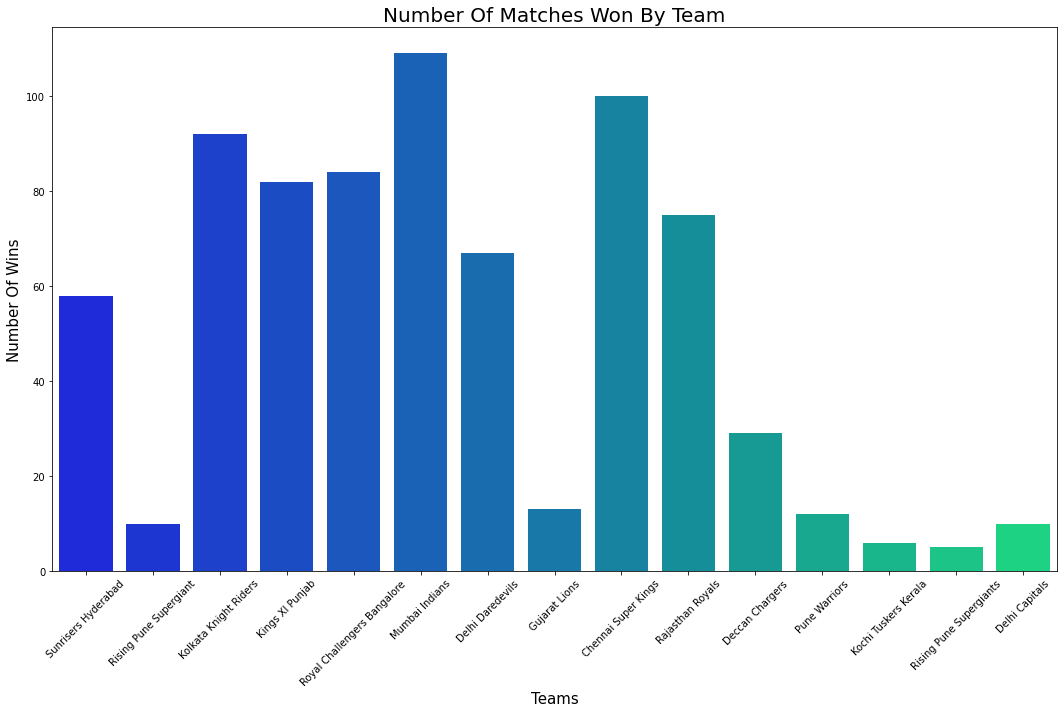

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(x='winner',data=data,palette='winter')
plt.title('Number Of Matches Won By Team',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Number Of Wins',fontsize=15)
plt.show()

In [11]:
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')

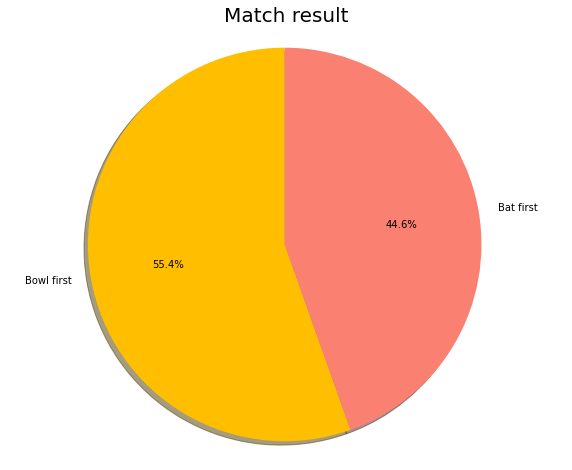

In [12]:
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00','#FA8072']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',shadow=True,startangle=90)
plt.title('Match result',fontsize=20)
plt.axis('equal')
plt.show()

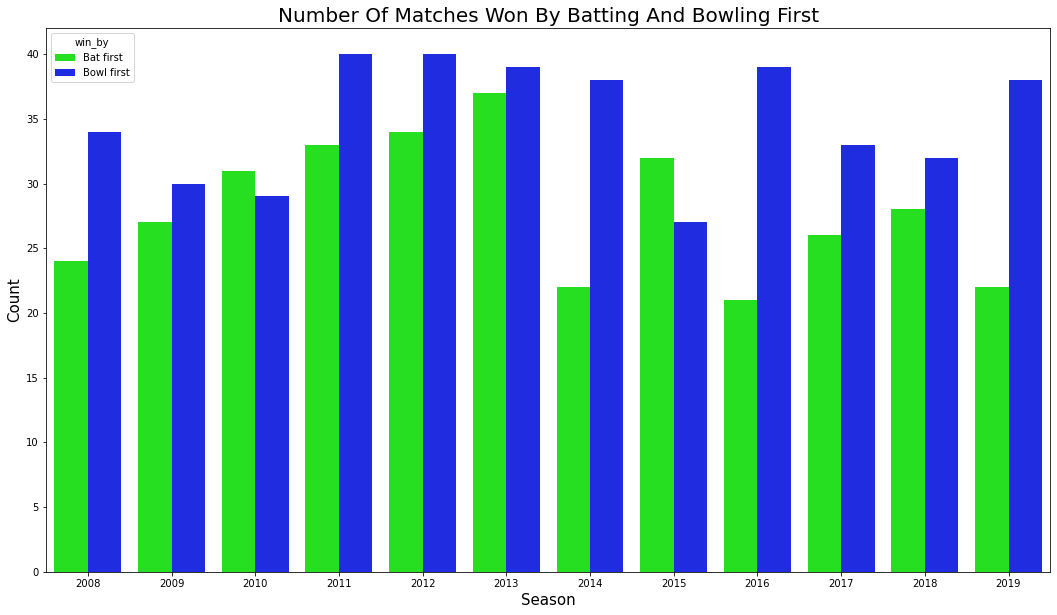

In [13]:
plt.figure(figsize=(18,10))
sns.countplot('season',hue='win_by', data=data,palette='hsv')
plt.title('Number Of Matches Won By Batting And Bowling First',fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

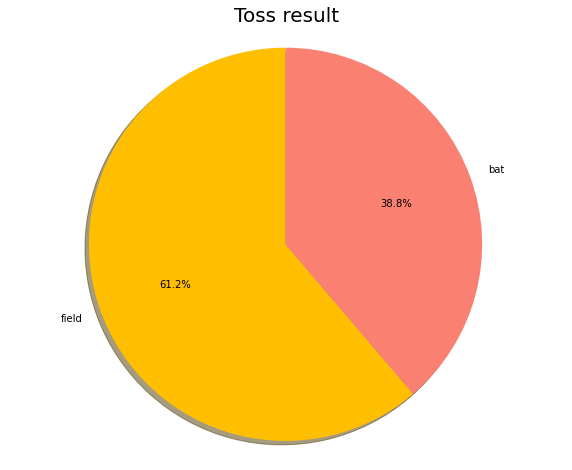

In [14]:
#pie chart for toss decision
Toss = data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors=['#FFBF00','#FA8072']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

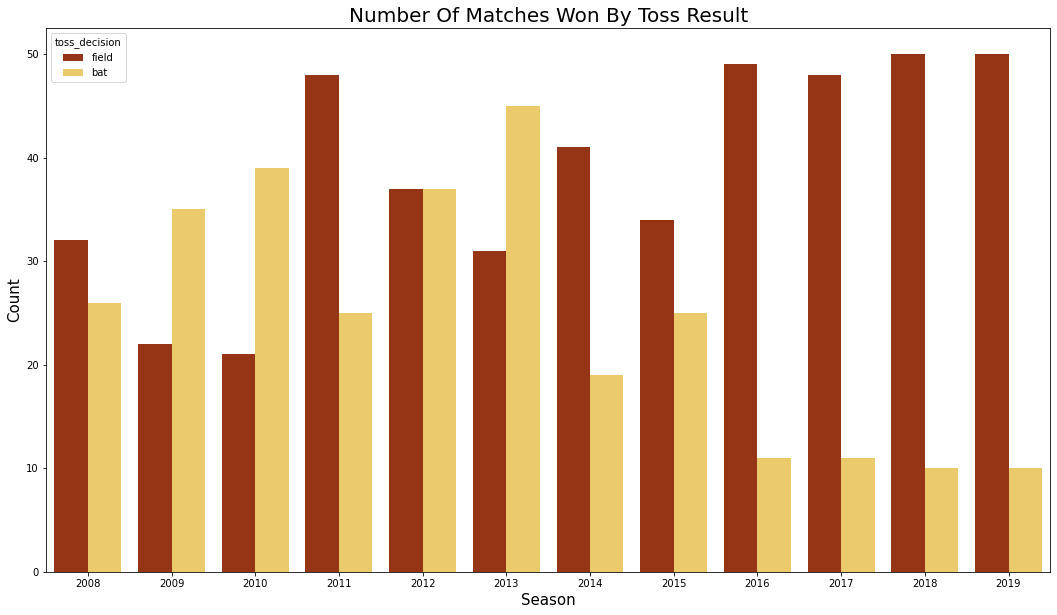

In [15]:
#we will plot graph on no. of matches won by toss result
plt.figure(figsize=(18,10))
sns.countplot('season',hue='toss_decision', data=data,palette='afmhot')
plt.title('Number Of Matches Won By Toss Result',fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [16]:
#we will print the winner season wise
final_matches = data.drop_duplicates(subset=['season'],keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


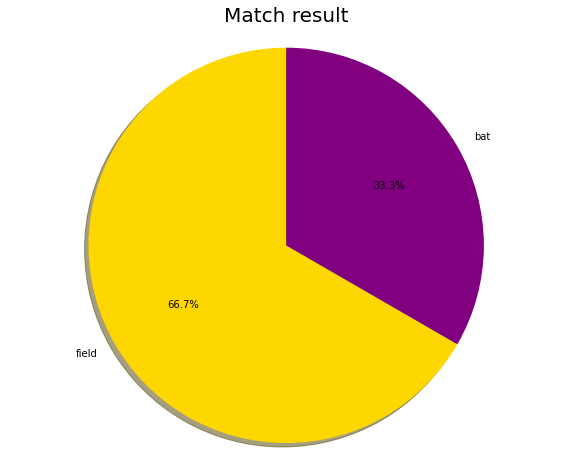

In [17]:
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors=['gold','purple']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',shadow=True,startangle=90)
plt.title('Match result',fontsize=20)
plt.axis('equal')
plt.show()

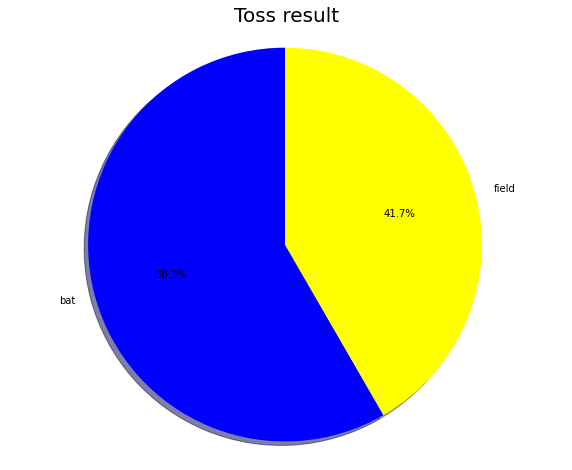

In [18]:
Toss = final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors=['blue','yellow']
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

<Figure size 1296x720 with 0 Axes>

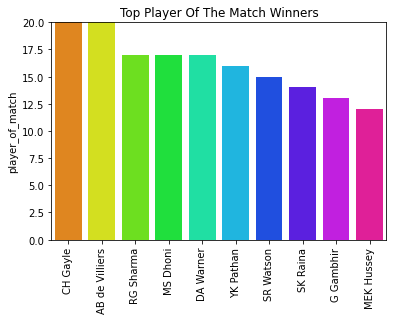

In [19]:
#we will print top player of IPL
plt.figure(figsize=(18,10))
top_players = data.player_of_match.value_counts()[:10]
fig,ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top Player Of The Match Winners")
top_players.plot.bar()
sns.barplot(x=top_players.index, y=top_players, orient='v', palette='hsv');
plt.show()

In [20]:
#we will print IPL finals venues and winners along with other number of wins
final_matches.groupby(['city', 'winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [21]:
#we will print of season won by a team
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

In [22]:
#we will print toss winner, toss decision, winner in final matches
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [23]:
#we will print the man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [24]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [25]:
# we will print no. of 4s hit by a team
four_data = complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('Runs by 4s','sum'),('Fours','count')])

,Runs by 4s,Fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


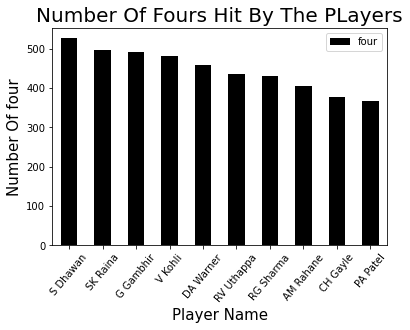

In [26]:
# We will plot graph of four hit by the player
batsman_four = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='black')
plt.title('Number Of Fours Hit By The PLayers',fontsize=20)
plt.xticks(rotation=50)
plt.xlabel('Player Name',fontsize=15)
plt.ylabel('Number Of four',fontsize=15)
plt.show()

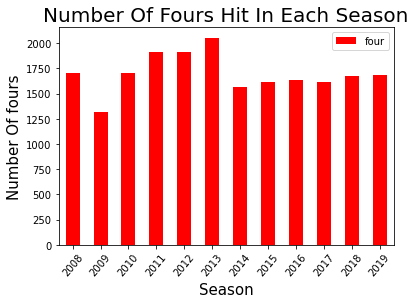

In [27]:
# We will plot graph of four hit by each season

ax = four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four', kind='bar', color='red')
plt.title('Number Of Fours Hit In Each Season',fontsize=20)
plt.xticks(rotation=50)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Number Of fours',fontsize=15)
plt.show()

In [28]:
# we will print no. of sixes hit by a team
six_data = complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


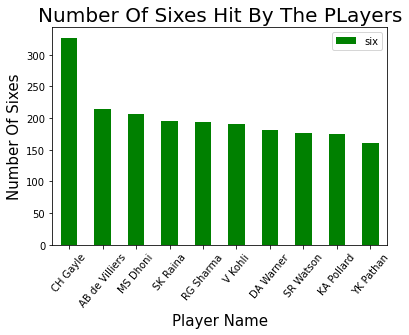

In [29]:
# We will plot graph of six hit by the players
batsman_six = six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title('Number Of Sixes Hit By The PLayers',fontsize=20)
plt.xticks(rotation=50)
plt.xlabel('Player Name',fontsize=15)
plt.ylabel('Number Of Sixes',fontsize=15)
plt.show()

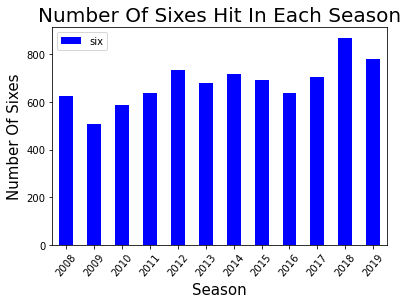

In [31]:
# We will plot graph of six hit by each season

ax = six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six', kind='bar', color='blue')
plt.title('Number Of Sixes Hit In Each Season',fontsize=20)
plt.xticks(rotation=50)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Number Of Sixes',fontsize=15)
plt.show()

In [32]:
# We will print top 10 leading run scorer in IPL
batsman_score=Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print('***Top 10 leading Run Scorer in IPL***')
batsman_score.iloc[:10,:]

***Top 10 leading Run Scorer in IPL***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [33]:
# We will print no. of matches played by batsman
No_Matches_player = Data[["match_id","player_dismissed"]]
No_Matches_player = No_Matches_player.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=['batsman','No of Matches']
No_Matches_player.head(5)

,batsman,No of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


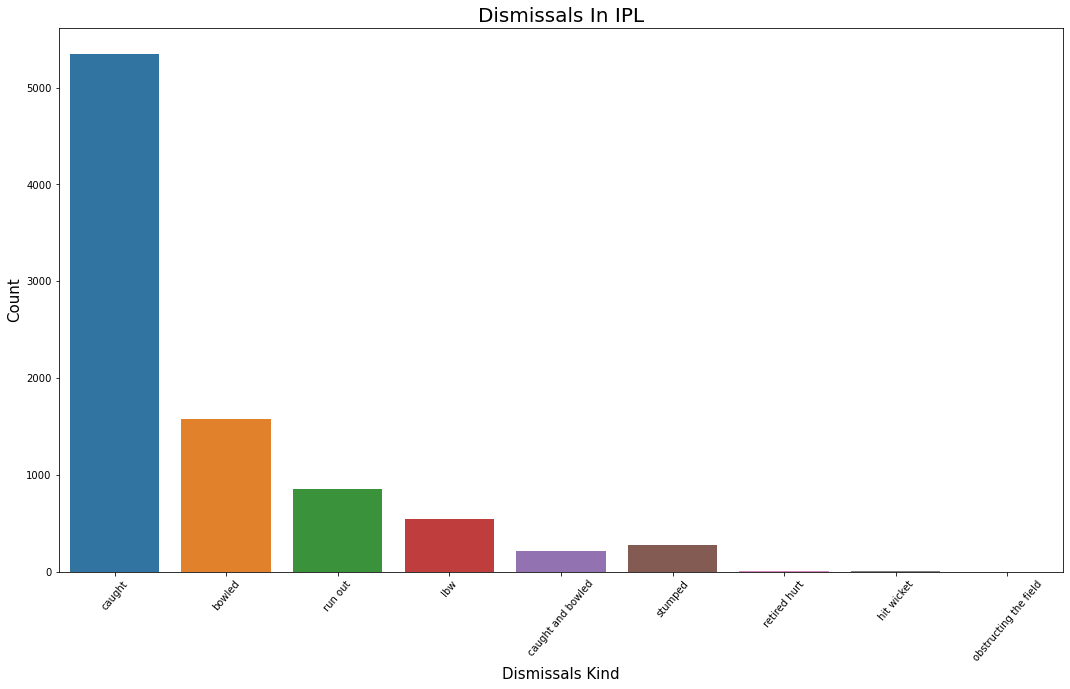

In [34]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax = sns.countplot(Data.dismissal_kind)
plt.title('Dismissals In IPL',fontsize=20)
plt.xticks(rotation=50)
plt.xlabel('Dismissals Kind',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [35]:
wicket_data = Data.dropna(subset=['dismissal_kind'])
wicket_data = wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
print('Number of Wickets fallen are: ',wicket_data.shape[0])

Number of Wickets fallen are:  7968


In [36]:
# We will print the IPL's most wicket taking bowler
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True)

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
...,...,...
343,BMAJ Mendis,1
344,TP Sudhindra,1
345,LA Carseldine,1
346,S Vidyut,1


# Conclusion:
1. The highest number of matches played in an IPL season was in year: 2011, 2012, 2013.

2. The highest number of matches were won by: Mumbai Indians.

3. Teams which bowl first have a higher chance of winning the match than the team which bat first.

4. After winning the toss majority of teams like to Bowl first.

5. In the IPL finals team which win the toss and choose to bowl first win more matches than the team which bat first.

6. In Finals, Teams tend to Bowl first after winning the toss.

7. Top MoM winners are: Chris Gayle, AB de Villiers.

8. It is also interesting that in IPL Finals 9 out of 12 times the Team winning the toss won the Finals.

9. The highest number of Fours were hit by : Shikhar Dhawan.

10. The highest number of sixes were hit by : Chris Gayle.

11. Top leading run scorers in IPL are: Virat Kohli, Suresh Raina, Rohit Sharma.

12. Dismissals in IPL were maximum by : Catch outs.

13. IPL's most wicket taking bowler: SL Mallinga.

So for a company to endorse for its products:
The best teams are: Mumbai Indians (MI), Chennai Super Kings (CSK), Royal Challengers Bangalore (RCB).

The best players are : Virat Kohli, Chris Gayle, AB de Villiers, Rohit Sharma, MS Dhoni.